## Final Project Submission

Please fill out:
* Student name: Wesley Yu
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


enter image here?

![example](images/director_shot.jpeg)

# King County Home Regression Analysis

**Authors:** Wesley Yu
***

## Overview

This project will use multiple linear regression to analyze house sales in King County WA.

## Business Problem

A real estate company is looking to expand into the King County market. They want to know what kind of features will affect house prices in this area so that they can advise potential home buyers.

## Data Understanding

Data set from King County contains 21,597 records of house sales during 2014 - 2015 period. Data also contains sale prices, various features describing the homes, condition of property when sold, and location details. Additional data from US Post office was added to help narrow down zipcodes.


## Data Preparation

### EDA 



In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
# check for duplicates
df.duplicated(subset = 'id').sum()

177

In [5]:
df[df.duplicated(subset = 'id', keep = False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [6]:
df.drop_duplicates(subset = 'id', keep = 'last', inplace = True)

Duplicates were found to be homes that were sold twice during 2014-2015 period. I decided to keep most recent records of house sales to reflect the changing market.

In [7]:
# check for nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
df.waterfront.value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [9]:
df.waterfront.fillna('NO', inplace = True)

In [10]:
df.waterfront.replace({'NO': 0, 'YES':1}, inplace = True)

I decided to replace null values in waterfall to 'NO' and convert binary values for inputting into model.

In [11]:
df.view.value_counts()

NONE         19253
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [12]:
df.view.fillna('NONE', inplace = True)

In [13]:
df.view.replace({'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD':3, 'EXCELLENT': 4}, inplace = True)

Same was done to view, and replaced with ordinal values with numeric

In [14]:
df.yr_renovated.value_counts()

0.0       16867
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1934.0        1
1971.0        1
1954.0        1
1950.0        1
1944.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
df.drop('yr_renovated', axis = 1, inplace = True)

There is a large number of nulls in the yr_renovated feature. Majority of values are also 0. We will drop this column.

In [16]:
df.sqft_basement.value_counts()

0.0       12716
?           452
600.0       216
700.0       206
500.0       206
          ...  
2390.0        1
1852.0        1
768.0         1
1024.0        1
143.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [17]:
df.sqft_basement.replace('?', 0, inplace = True)
df.sqft_basement = df.sqft_basement.astype(float)

In [18]:
(df.sqft_basement + df.sqft_above == df.sqft_living).sum()

21251

In [19]:
df.loc[(df.sqft_basement + df.sqft_above != df.sqft_living), 'sqft_basement'] = 1

In [20]:
df.loc[df.sqft_basement > 0, 'sqft_basement'] = 1

In [21]:
df.rename(columns = {'sqft_basement': 'basement'}, inplace = True)

Replacing '?' with 0. It looks like sqft_basement + sqft_above = sqft_living for almost every value. Changed sqft_basement to new column with binary values, 0 for no basement and 1 for basement. The 170 records where sqft_basement + sqft_above != sqft_living will be assign to 1 (has basement).

In [22]:
df.condition.value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [23]:
df.condition.replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good':4, 'Very Good': 5}, inplace = True)

Condition values changed from ordinal to numeric for modeling purposes.

In [24]:
df.grade.value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [25]:
df.grade = df.grade.str.extract('(\d+)').astype(int)

Grade feature we will keep only digit values and convert to numeric.

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,0.393137,1971.092997,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,0.488458,29.387141,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1.000000,1997.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,1.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Quick summary shows an odd outlier for bedrooms. Upon examination this could be a typo, I changed value to 3.

In [27]:
df[df.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,1.0,1947,98103,47.6878,-122.331,1330,4700


In [28]:
df.loc[df.bedrooms == 33, 'bedrooms'] = 3

In [29]:
df.bathrooms.value_counts()

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [30]:
df.bathrooms = df.bathrooms.map(np.ceil)

I decide to treat 1/4, 1/2, and 3/4 bathrooms as whole bathrooms, for easier interpretation.

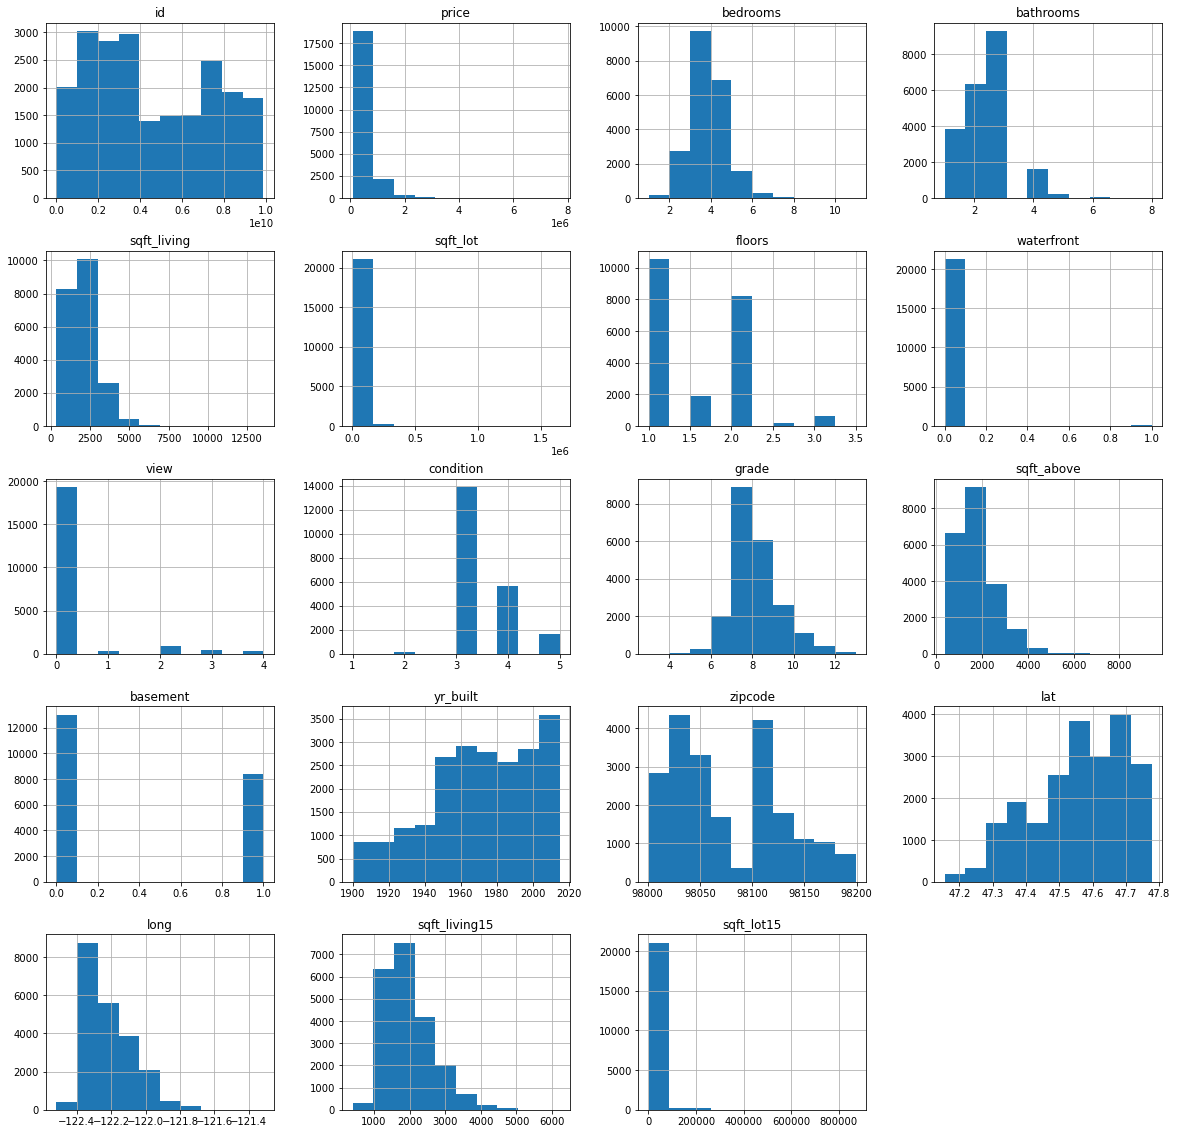

In [31]:
# take a quick look at distribution of each variable
df.hist(figsize = (20,20));

### Dealing with outliers

For model optimization, i decide to remove any values in feature that represent less than 1% of the data.

In [32]:
df.bedrooms.value_counts(normalize = True)

3     0.454342
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
11    0.000047
Name: bedrooms, dtype: float64

In [33]:
df.drop(df[(df.bedrooms < 2) | (df.bedrooms > 6)].index, inplace = True)

In [34]:
df.bathrooms.value_counts(normalize = True)

3.0    0.438634
2.0    0.299745
1.0    0.175028
4.0    0.074877
5.0    0.010015
6.0    0.001370
7.0    0.000236
8.0    0.000094
Name: bathrooms, dtype: float64

In [35]:
df.drop(df[df.bathrooms > 4].index, inplace = True)

In [36]:
df.condition.value_counts(normalize = True)

3    0.647275
4    0.265057
5    0.079207
2    0.007314
1    0.001147
Name: condition, dtype: float64

In [37]:
df.drop(df[df.condition < 3].index, inplace = True)

In [38]:
df.grade.value_counts(normalize = True)

7     0.420527
8     0.288001
9     0.123897
6     0.089572
10    0.050764
11    0.014993
5     0.008726
12    0.002700
4     0.000627
13    0.000193
Name: grade, dtype: float64

In [39]:
df.drop(df[(df.grade < 5) | (df.grade > 11)].index, inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20670 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20670 non-null  int64  
 1   date           20670 non-null  object 
 2   price          20670 non-null  float64
 3   bedrooms       20670 non-null  int64  
 4   bathrooms      20670 non-null  float64
 5   sqft_living    20670 non-null  int64  
 6   sqft_lot       20670 non-null  int64  
 7   floors         20670 non-null  float64
 8   waterfront     20670 non-null  int64  
 9   view           20670 non-null  int64  
 10  condition      20670 non-null  int64  
 11  grade          20670 non-null  int32  
 12  sqft_above     20670 non-null  int64  
 13  basement       20670 non-null  float64
 14  yr_built       20670 non-null  int64  
 15  zipcode        20670 non-null  int64  
 16  lat            20670 non-null  float64
 17  long           20670 non-null  float64
 18  sqft_l

In [41]:
(df.sqft_lot > 200000).sum()

231

In [42]:
df.drop(df[df.sqft_lot > 200000].index, inplace = True)

In [43]:
counts = df.zipcode.value_counts(normalize = True)

In [44]:
df = df[~df.zipcode.isin(counts[counts < 0.01].index)]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17796 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17796 non-null  int64  
 1   date           17796 non-null  object 
 2   price          17796 non-null  float64
 3   bedrooms       17796 non-null  int64  
 4   bathrooms      17796 non-null  float64
 5   sqft_living    17796 non-null  int64  
 6   sqft_lot       17796 non-null  int64  
 7   floors         17796 non-null  float64
 8   waterfront     17796 non-null  int64  
 9   view           17796 non-null  int64  
 10  condition      17796 non-null  int64  
 11  grade          17796 non-null  int32  
 12  sqft_above     17796 non-null  int64  
 13  basement       17796 non-null  float64
 14  yr_built       17796 non-null  int64  
 15  zipcode        17796 non-null  int64  
 16  lat            17796 non-null  float64
 17  long           17796 non-null  float64
 18  sqft_l

In [112]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,sqft_living15,sqft_lot15,house_age
count,1.779600e+04,17796.000000,17796.00000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000,17796.000000
mean,5.278620e+05,3.369858,2.42105,2046.780119,10390.897505,1.496319,0.005507,0.219656,3.425433,7.644639,1755.260789,0.401382,1973.232637,9635.004945,42.996460
std,3.076427e+05,0.836226,0.86342,824.713704,14388.996247,0.543939,0.074006,0.738777,0.636532,1.085517,760.644940,0.490192,658.976262,13135.624092,29.175595
min,8.300000e+04,2.000000,1.00000,540.000000,520.000000,1.000000,0.000000,0.000000,3.000000,5.000000,480.000000,0.000000,399.000000,651.000000,-1.000000
25%,3.290000e+05,3.000000,2.00000,1430.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1490.000000,5000.000000,17.000000
50%,4.510000e+05,3.000000,3.00000,1910.000000,7352.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1830.000000,7427.000000,40.000000
75%,6.380375e+05,4.000000,3.00000,2510.000000,10000.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,1.000000,2350.000000,9623.000000,63.000000
max,3.600000e+06,6.000000,4.00000,7620.000000,199940.000000,3.500000,1.000000,4.000000,5.000000,11.000000,5990.000000,1.000000,5790.000000,297514.000000,115.000000


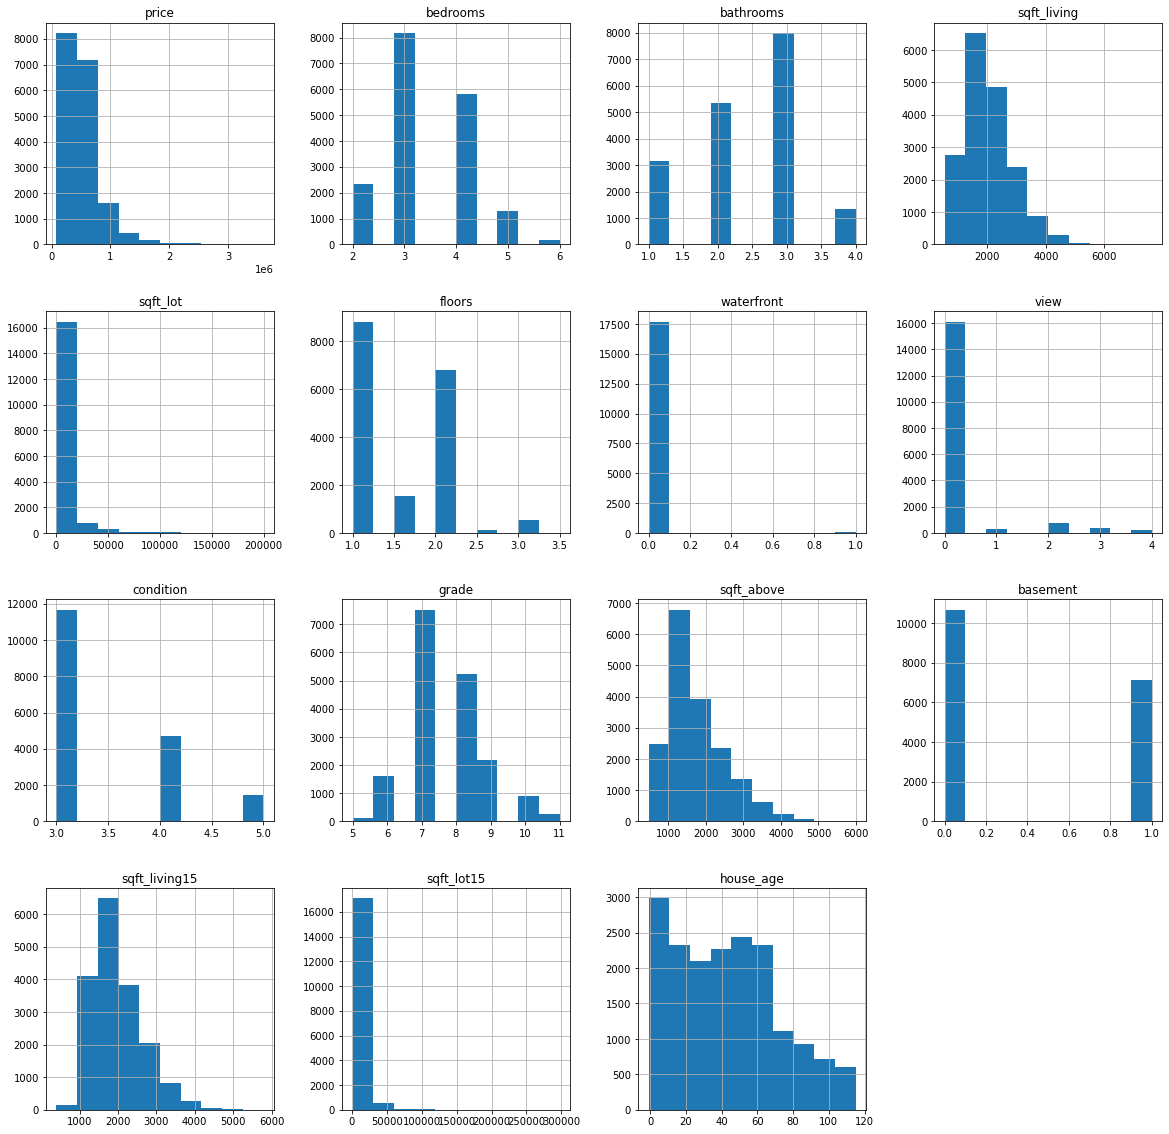

In [113]:
df.hist(figsize = (20,20));

### Feature Engineering


Create a new column representing age of the property.

In [46]:
df.date = pd.to_datetime(df.date)
df['house_age'] = df.date.dt.year - df.yr_built

To help cut down the size of unique zipcode variables, I bring in data on which cities the zipcodes belong to.

In [47]:
df.zipcode.value_counts().size

50

In [48]:
data = pd.read_csv('data/zip_code_database.csv')
zip_king = data[(data.county == 'King County') & (data.state == 'WA') & (data['type'] == 'STANDARD')]

In [49]:
zip_king.head()

,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population
41717,98001,STANDARD,0,Auburn,"Algona, Federal Way",NaN,WA,King County,America/Los_Angeles,253,NaN,US,47.30,-122.26,33430
41718,98002,STANDARD,0,Auburn,NaN,NaN,WA,King County,America/Los_Angeles,253,NaN,US,47.31,-122.22,32480
41719,98003,STANDARD,0,Federal Way,Auburn,NaN,WA,King County,America/Los_Angeles,253,NaN,US,47.30,-122.31,43690
41720,98004,STANDARD,0,Bellevue,"Beaux Arts, Clyde Hill, Hunts Point, Yarrow Point",Beaux Arts Village,WA,King County,America/Los_Angeles,425,NaN,US,47.61,-122.21,33200
41721,98005,STANDARD,0,Bellevue,NaN,NaN,WA,King County,America/Los_Angeles,425,NaN,US,47.62,-122.16,19280


In [50]:
king_cities = zip_king[['zip', 'primary_city']]

In [51]:
df = pd.merge(df, king_cities, left_on='zipcode', right_on='zip', how='left') 

In [52]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,zip,primary_city
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,0.0,1955,98178,47.5112,-122.257,1340,5650,59,98178,Seattle
1,6414100192,2014-12-09,538000.0,3,3.0,2570,7242,2.0,0,0,...,1.0,1951,98125,47.7210,-122.319,1690,7639,63,98125,Seattle
2,5631500400,2015-02-25,180000.0,2,1.0,770,10000,1.0,0,0,...,0.0,1933,98028,47.7379,-122.233,2720,8062,82,98028,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.0,1960,5000,1.0,0,0,...,1.0,1965,98136,47.5208,-122.393,1360,5000,49,98136,Seattle
4,1954400510,2015-02-18,510000.0,3,2.0,1680,8080,1.0,0,0,...,0.0,1987,98074,47.6168,-122.045,1800,7503,28,98074,Sammamish


Removing unused columns

In [53]:
todrop = ['id', 'date', 'lat', 'long', 'zipcode', 'zip', 'yr_built']

In [54]:
df.drop(todrop, axis = 1, inplace = True)

Splitting data set to train/test data sets for model validation later on.

In [55]:
X = df.drop('price', axis = 1)
y = df.price

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [57]:
print(X_train.shape, y_train.shape)

(14236, 15) (14236,)


Split categorical variables from numeric

In [58]:
X_train_num = X_train.drop('primary_city', axis = 1)

In [59]:
X_train_num.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,basement,sqft_living15,sqft_lot15,house_age
6634,4,3.0,1690,7260,1.0,0,0,3,7,1080,1.0,1690,7700,36
11444,3,2.0,1810,17006,2.0,0,4,3,8,1810,0.0,2180,24911,101
15396,2,2.0,1870,5580,1.0,0,0,3,8,1870,0.0,1670,4500,10
12222,3,2.0,1700,11613,1.0,0,0,5,7,1180,1.0,1500,12377,38
2086,3,1.0,1010,7633,1.0,0,0,4,6,1010,0.0,1190,8386,53


In [60]:
X_train_cat = X_train.primary_city

Using pandas to create dummy variables for primary_city. Dropping a column to avoid multicolinearity.

In [61]:
dummies = pd.get_dummies(X_train_cat)
dummies.drop('Seattle', axis = 1, inplace = True)
X_train_cat = pd.concat([X_train_cat, dummies], axis = 1)
X_train_cat.drop('primary_city', axis = 1, inplace = True)
X_train_cat.head()

,Auburn,Bellevue,Federal Way,Issaquah,Kenmore,Kent,Kirkland,Maple Valley,Mercer Island,Redmond,Renton,Sammamish,Snoqualmie,Woodinville
6634,0,0,1,0,0,0,0,0,0,0,0,0,0,0
11444,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15396,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12222,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2086,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Feature Selection

Linear regression is a great method to determine the strength of predictors. In order for linear regression to produce trustworthy results there are certain assumptions that need to be followed: 
* Linearity - relationship between predictor and target should be linear.
* Independence - Observations are independent from each other, low or no multicollinearity.
* Normality - Errors should be normally distributed
* Homoscedasticity - variance or the errors is the same

First we check the assumption of independence by identifying multicollinearity among the predictors, this can be done by 

In [62]:
corr = X_train_num.corr()

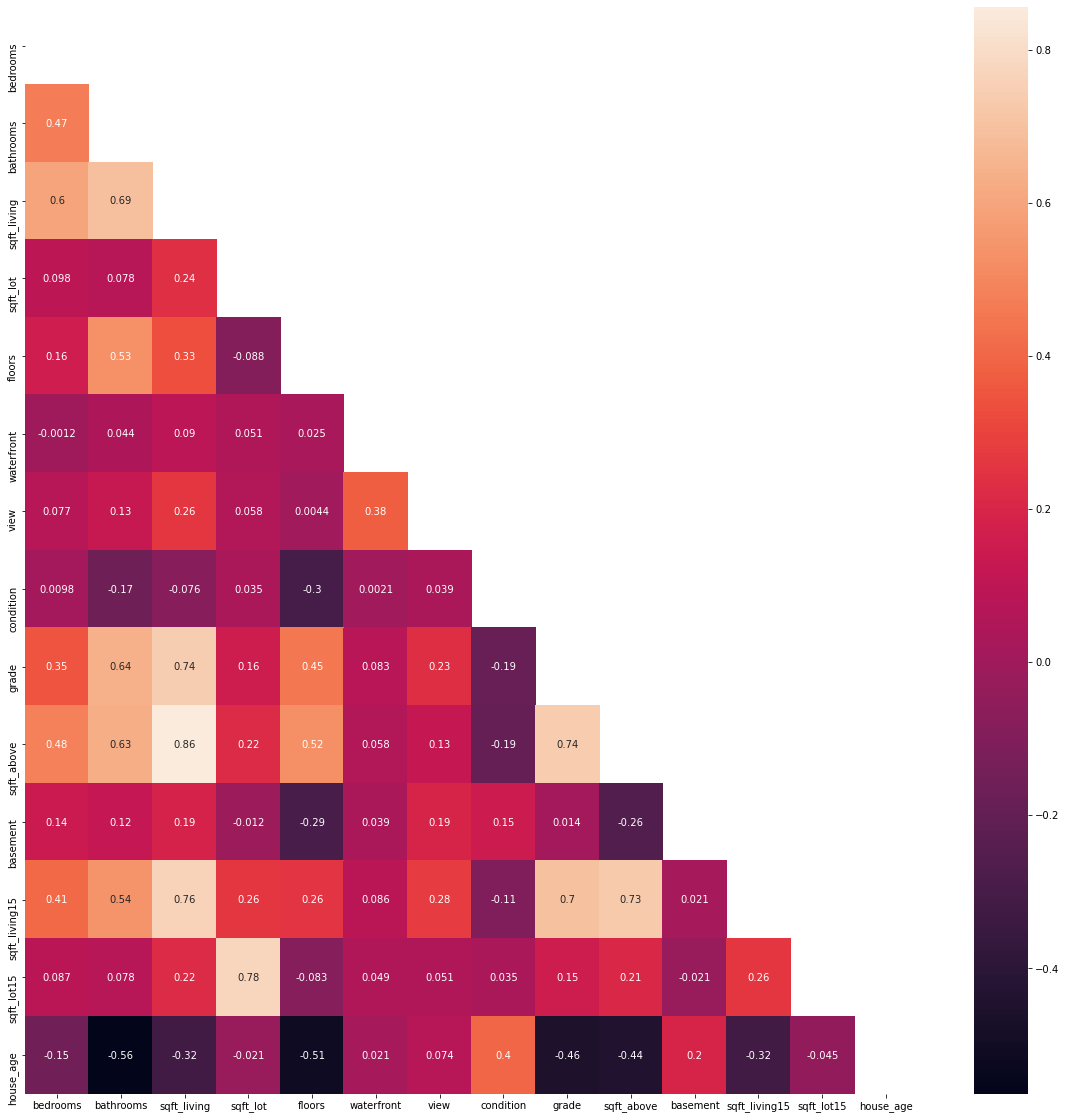

In [63]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)), ax=ax,\
            annot=True,);

Generally 0.7 - 0.8 or higher absolute value of correlation is considered high. We will take anything above 0.75 as a cut-off.

In [64]:
corr_list = corr.abs().stack().reset_index().sort_values(0, ascending=False)
corr_list['pairs'] = list(zip(corr_list.level_0, corr_list.level_1))
corr_list.set_index(['pairs'], inplace = True)
corr_list.drop(columns=['level_1', 'level_0'], inplace = True)
corr_list.columns = ['cc']
corr_list.drop_duplicates(inplace=True)
corr_list[(corr_list.cc > .75) & (corr_list.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.856037
"(sqft_lot15, sqft_lot)",0.777671
"(sqft_living, sqft_living15)",0.763312


sqft_above, sqft_living, sqft_lot15, sqft_lot, and sqft_living15 are found to be highly correlated variables. 
Removing all but sqft_living and sqft_lot should help with multicollinearity problems.

In [65]:
baseX = X_train_num.drop(['sqft_above', 'sqft_lot15', 'sqft_living15'], axis = 1)

To start our baseline model we will select variables that have the highest correlation with our target price, which is found to be sqft_living and grade.

In [66]:
corr_data = pd.concat([y_train, baseX], axis=1)
corr_data.corr().price.abs().sort_values(ascending = False)

price          1.000000
sqft_living    0.658881
grade          0.643985
bathrooms      0.436408
view           0.399204
bedrooms       0.300648
waterfront     0.257937
floors         0.234218
basement       0.176716
sqft_lot       0.117743
condition      0.038430
house_age      0.020894
Name: price, dtype: float64

Linearity of variables with the target can be checked with a simple scatter plot.

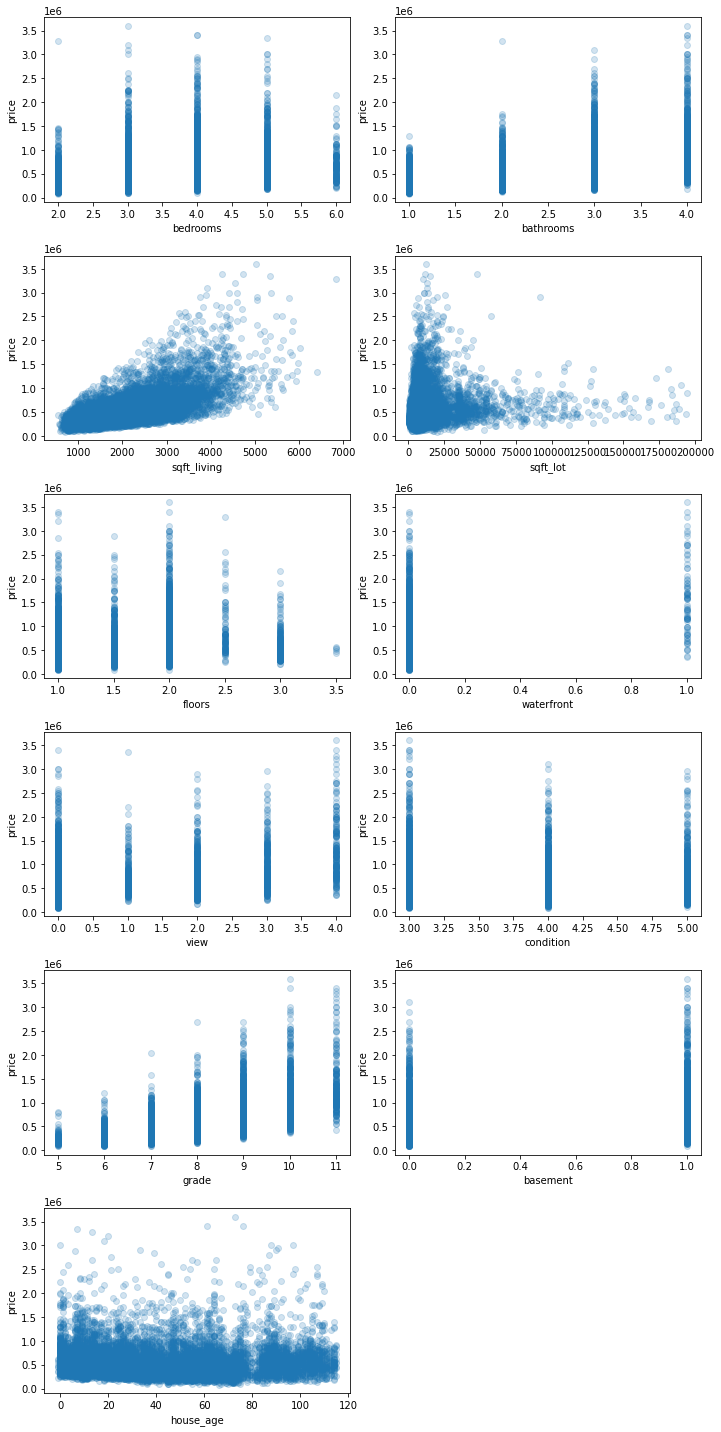

In [67]:
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(10, 20))
fig.set_tight_layout(True)
fig.delaxes(axes[5,1])

for index, col in enumerate(baseX.columns):
    ax = axes[index//2][index%2]
    ax.scatter(baseX[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

A linear relationship is not visable for 'house_age', 'bedrooms', 'floors', 'sqft_lot'

In [68]:
baseX.drop(['house_age', 'bedrooms', 'floors', 'sqft_lot'], axis = 1, inplace = True)

In [69]:
baseX.head()

,bathrooms,sqft_living,waterfront,view,condition,grade,basement
6634,3.0,1690,0,0,3,7,1.0
11444,2.0,1810,0,4,3,8,0.0
15396,2.0,1870,0,0,3,8,0.0
12222,2.0,1700,0,0,5,7,1.0
2086,1.0,1010,0,0,4,6,0.0


## Modeling

### Baseline Model

Baseline model will consist of the 2 highest correlated variables to our target

In [70]:
high_corr = ['sqft_living', 'grade']
firstX = baseX[high_corr]

In [71]:
model = sm.OLS(y_train, sm.add_constant(firstX)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     6790.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        01:21:22   Log-Likelihood:            -1.9540e+05
No. Observations:               14236   AIC:                         3.908e+05
Df Residuals:                   14233   BIC:                         3.908e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.311e+05   1.51e+04    -35.160      0.000   -5.61e+05   -5.01e+05
sqft_living   151.2517      3.344     45.233      0.000     144.697     157.806
grade        9.813e+04   2528.559     38.810      0.000    9.32e+04    1.03e+05
==============================================================================
Omnibus:                     7559.432   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           104375.947
Skew:                           2.240   Prob(JB):                         0.00
Kurtosis:                      15.486   Cond. No.                     1.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 value of 0.488 shows that only around 49% of prices variance is explained by sqft living and grade. 
p-values for all predictors round to 0, which indicates that they have statistical significance.
coef for sqft_living shows for each unit of increased in sqft_living, price will increase by 151.25
same for grade with an increase of 98,130 in price for each unit of grade increase.

#### Check for normality of residuals with QQ plot.

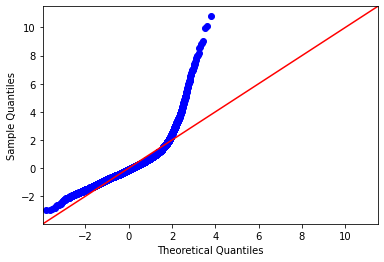

In [72]:
preds = model.predict(sm.add_constant(firstX))
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Check for homoscedasticity in residuals with scatterplot.

In [73]:
y_pred = model.predict(sm.add_constant(firstX))

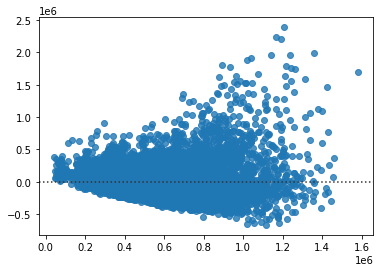

In [74]:
sns.residplot(x = y_pred, y = residuals);

Assumptions for normality and homoscedasticity are found to be false. This can be corrected by log transformation of the target 'price', as its distribution was right skewed.

In [75]:
y_train_log = np.log(y_train)
firstX_log = pd.DataFrame({})
firstX_log['grade'] = baseX.grade
firstX_log['sqft_living_log'] = np.log(baseX.sqft_living)

In [76]:
model_log = sm.OLS(y_train_log, sm.add_constant(firstX_log)).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     7114.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        01:21:23   Log-Likelihood:                -5204.3
No. Observations:               14236   AIC:                         1.041e+04
Df Residuals:                   14233   BIC:                         1.044e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.4226      0.061    137.073      0.000       8.302       8.543
grade               0.1901      0.004     49.248      0.000       0.182       0.198
sqft_living_log     0.4206      0.010     40.137      0.000       0.400       0.441
==============================================================================
Omnibus:                       45.227   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.251
Skew:                           0.121   Prob(JB):                     2.46e-10
Kurtosis:                       2.872   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After log transformation of our target coef for predictors are now in terms of log.
Each percent of unit increase of sqft_living will increase price by 0.42%
unit increase in grade will result in a 19% increase in price.
R^2 value has also increased a bit after the transformation as well.

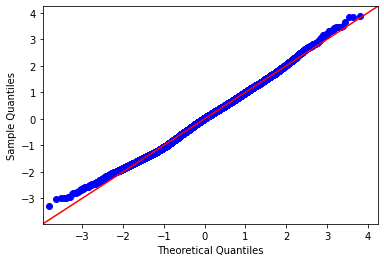

In [77]:
preds = model_log.predict(sm.add_constant(firstX_log))
residuals = model_log.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

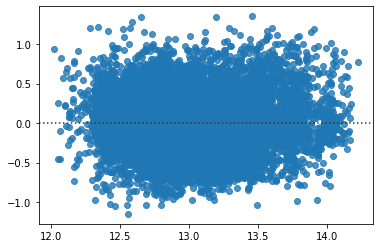

In [78]:
y_pred = model_log.predict(sm.add_constant(firstX_log))
sns.residplot(x = y_pred, y = residuals);

Assumptions for normality and homoscedasticity are now satisfied.

### Model 2

Adding moderately correlated variables to see if we can increase R^2 score.

In [79]:
corr_data = pd.concat([y_train, baseX], axis=1)
corr_data.corr().price.abs().sort_values(ascending = False)

price          1.000000
sqft_living    0.658881
grade          0.643985
bathrooms      0.436408
view           0.399204
waterfront     0.257937
basement       0.176716
condition      0.038430
Name: price, dtype: float64

In [80]:
moderate = ['bathrooms', 'view', 'waterfront']
secondX = pd.concat([firstX_log, baseX[moderate]], axis=1)

In [81]:
model2 = sm.OLS(y_train_log, sm.add_constant(secondX)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     3255.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        01:21:23   Log-Likelihood:                -4708.9
No. Observations:               14236   AIC:                             9430.
Df Residuals:                   14230   BIC:                             9475.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.3814      0.072    116.477      0.000       8.240       8.522
grade               0.1877      0.004     48.421      0.000       0.180       0.195
sqft_living_log     0.4379      0.012     37.393      0.000       0.415       0.461
bathrooms          -0.0397      0.005     -8.102      0.000      -0.049      -0.030
view                0.1034      0.004     24.060      0.000       0.095       0.112
waterfront          0.3377      0.041      8.229      0.000       0.257       0.418
==============================================================================
Omnibus:                       17.456   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.244
Skew:                           0.024   Prob(JB):                     0.000490
Kurtosis:                       2.847   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 has increased
p-values round to 0
assumptions for normality and homoscedasticity still hold.

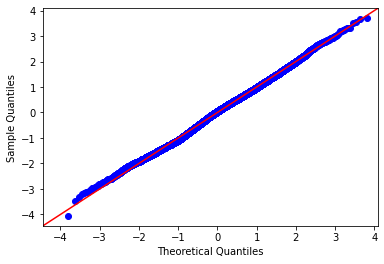

In [82]:
preds = model2.predict(sm.add_constant(secondX))
residuals = model2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

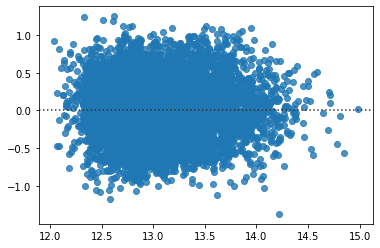

In [83]:
y_pred = model2.predict(sm.add_constant(secondX))
sns.residplot(x = y_pred, y = residuals);

### Model 3

Adding in our dummy encoded variables to see if location can account for any variance in the data.

In [84]:
thirdX = pd.concat([secondX, X_train_cat], axis=1)

In [123]:
model3 = sm.OLS(y_train_log, sm.add_constant(thirdX)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     2100.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        12:53:21   Log-Likelihood:                -622.53
No. Observations:               14236   AIC:                             1285.
Df Residuals:                   14216   BIC:                             1436.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.4630      0.055    153.269      0.000       8.355       8.571
grade               0.1492      0.003     49.642      0.000       0.143       0.155
sqft_living_log     0.4709      0.009     52.870      0.000       0.453       0.488
bathrooms          -0.0035      0.004     -0.925      0.355      -0.011       0.004
view                0.0664      0.003     20.120      0.000       0.060       0.073
waterfront          0.3746      0.031     12.147      0.000       0.314       0.435
Auburn             -0.5844      0.011    -50.925      0.000      -0.607      -0.562
Bellevue            0.1837      0.010     18.856      0.000       0.165       0.203
Federal Way        -0.6129      0.011    -57.016      0.000      -0.634      -0.592
Issaquah           -0.0689      0.012     -5.975      0.000      -0.091      -0.046
Kenmore            -0.1867      0.017    -10.780      0.000      -0.221      -0.153
Kent               -0.5187      0.009    -54.794      0.000      -0.537      -0.500
Kirkland            0.0456      0.010      4.655      0.000       0.026       0.065
Maple Valley       -0.4352      0.012    -34.822      0.000      -0.460      -0.411
Mercer Island       0.3021      0.019     16.322      0.000       0.266       0.338
Redmond             0.0129      0.010      1.265      0.206      -0.007       0.033
Renton             -0.3263      0.008    -40.529      0.000      -0.342      -0.311
Sammamish          -0.0579      0.011     -5.128      0.000      -0.080      -0.036
Snoqualmie         -0.1930      0.017    -11.569      0.000      -0.226      -0.160
Woodinville        -0.0955      0.018     -5.433      0.000      -0.130      -0.061
==============================================================================
Omnibus:                      406.866   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              970.156
Skew:                          -0.112   Prob(JB):                    2.15e-211
Kurtosis:                       4.259   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 score has increased to 0.737
p=value for bathrooms now 0.355 we can consider dropping for next model.
p-value for federal way also showing to be barely non significant at 0.057.
Since we dropped Seattle dummy variable. coeffiencents for listed cities are in reference to Seattle. 
the price of a similar house in Auburn is around 58% cheaper than seattle.

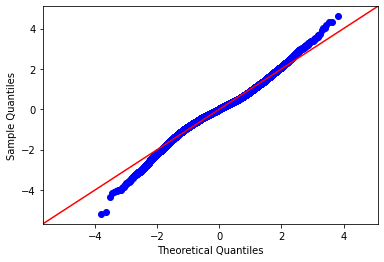

In [86]:
preds = model3.predict(sm.add_constant(thirdX))
residuals = model3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

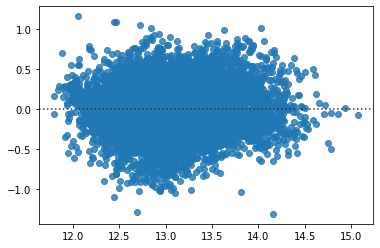

In [87]:
y_pred = model3.predict(sm.add_constant(thirdX))
sns.residplot(x = y_pred, y = residuals);

### Model 4

Instead of manually going through models of different variables. We can take advantage of RFE, recurrsive feature elimination. 

In [88]:
X_train_num.sqft_living = np.log(X_train_num.sqft_living)

In [89]:
rfeX = pd.concat([X_train_num, X_train_cat], axis = 1)

In [105]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=20)

In [106]:
select.fit(X=rfeX, y=y_train_log)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [107]:
features = select.support_

In [108]:
finalX = rfeX[rfeX.columns[features]]

In [120]:
model4 = sm.OLS(y_train_log, sm.add_constant(finalX)).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     2096.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        12:42:40   Log-Likelihood:                -360.77
No. Observations:               14236   AIC:                             763.5
Df Residuals:                   14215   BIC:                             922.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.2617      0.047    175.012      0.000       8.169       8.354
sqft_living       0.4473      0.008     57.831      0.000       0.432       0.462
floors            0.0324      0.005      7.081      0.000       0.023       0.041
waterfront        0.3770      0.030     12.444      0.000       0.318       0.436
view              0.0650      0.003     19.945      0.000       0.059       0.071
condition         0.0808      0.004     22.999      0.000       0.074       0.088
grade             0.1548      0.003     50.514      0.000       0.149       0.161
Auburn           -0.5744      0.011    -50.964      0.000      -0.596      -0.552
Bellevue          0.1740      0.010     17.906      0.000       0.155       0.193
Federal Way      -0.6028      0.011    -56.855      0.000      -0.624      -0.582
Issaquah         -0.0652      0.011     -5.782      0.000      -0.087      -0.043
Kenmore          -0.1706      0.017    -10.016      0.000      -0.204      -0.137
Kent             -0.5205      0.009    -56.194      0.000      -0.539      -0.502
Kirkland          0.0515      0.010      5.341      0.000       0.033       0.070
Maple Valley     -0.4218      0.012    -34.420      0.000      -0.446      -0.398
Mercer Island     0.2732      0.018     14.933      0.000       0.237       0.309
Redmond           0.0289      0.010      2.874      0.004       0.009       0.049
Renton           -0.3296      0.008    -41.675      0.000      -0.345      -0.314
Sammamish        -0.0429      0.011     -3.866      0.000      -0.065      -0.021
Snoqualmie       -0.1715      0.016    -10.444      0.000      -0.204      -0.139
Woodinville      -0.0808      0.017     -4.677      0.000      -0.115      -0.047
==============================================================================
Omnibus:                      377.232   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              915.728
Skew:                          -0.061   Prob(JB):                    1.42e-199
Kurtosis:                       4.237   Cond. No.                         264.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

strong R^2 of 0.747, adjusted R^2 also high. 
p-values of all predictors round to 0
Strongest predictors show to be location based. followed by grade and condition of the house.

In [121]:
np.sqrt(model4.mse_resid)

0.24836430229797823

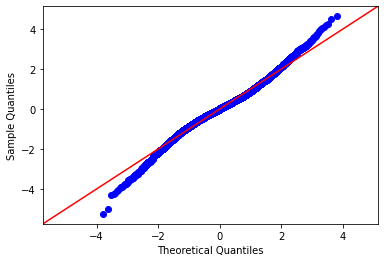

In [95]:
preds = model4.predict(sm.add_constant(finalX))
residuals = model4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

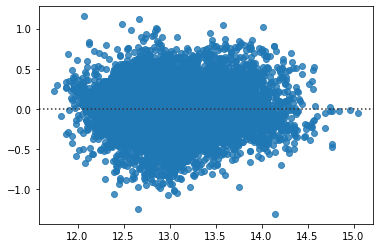

In [96]:
y_pred = model4.predict(sm.add_constant(finalX))
sns.residplot(x = y_pred, y = residuals);

### Model 5

In [124]:
all = pd.concat([X_train_num, X_train_cat], axis = 1)

In [125]:
model5 = sm.OLS(y_train_log, sm.add_constant(all)).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1748.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        13:02:57   Log-Likelihood:                 481.62
No. Observations:               14236   AIC:                            -905.2
Df Residuals:                   14207   BIC:                            -685.9
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.3157      0.104     89.573      0.000       9.112       9.520
bedrooms         -0.0290      0.003     -9.253      0.000      -0.035      -0.023
bathrooms         0.0470      0.004     11.445      0.000       0.039       0.055
sqft_living       0.2500      0.016     15.338      0.000       0.218       0.282
sqft_lot       9.265e-07   2.27e-07      4.081      0.000    4.81e-07    1.37e-06
floors            0.0770      0.005     14.137      0.000       0.066       0.088
waterfront        0.3765      0.029     13.154      0.000       0.320       0.433
view              0.0450      0.003     14.235      0.000       0.039       0.051
condition         0.0501      0.004     14.324      0.000       0.043       0.057
grade             0.1487      0.003     45.448      0.000       0.142       0.155
sqft_above     7.135e-05   8.47e-06      8.425      0.000    5.48e-05     8.8e-05
basement          0.0662      0.007      9.137      0.000       0.052       0.080
sqft_living15  8.599e-05   5.36e-06     16.029      0.000    7.55e-05    9.65e-05
sqft_lot15    -1.448e-06   2.57e-07     -5.628      0.000   -1.95e-06   -9.44e-07
house_age         0.0036      0.000     33.785      0.000       0.003       0.004
Auburn           -0.4859      0.011    -43.101      0.000      -0.508      -0.464
Bellevue          0.2049      0.010     21.316      0.000       0.186       0.224
Federal Way      -0.5303      0.010    -50.937      0.000      -0.551      -0.510
Issaquah         -0.0027      0.011     -0.243      0.808      -0.025       0.019
Kenmore          -0.1189      0.016     -7.289      0.000      -0.151      -0.087
Kent             -0.4326      0.010    -45.383      0.000      -0.451      -0.414
Kirkland          0.1103      0.009     11.645      0.000       0.092       0.129
Maple Valley     -0.3304      0.012    -26.601      0.000      -0.355      -0.306
Mercer Island     0.2726      0.018     15.513      0.000       0.238       0.307
Redmond           0.0916      0.010      8.892      0.000       0.071       0.112
Renton           -0.2595      0.008    -31.765      0.000      -0.275      -0.243
Sammamish        -0.0091      0.011     -0.807      0.420      -0.031       0.013
Snoqualmie       -0.1189      0.016     -7.339      0.000      -0.151      -0.087
Woodinville      -0.0426      0.017     -2.520      0.012      -0.076      -0.009
==============================================================================
Omnibus:                      464.608   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.239
Skew:                          -0.211   Prob(JB):                    6.93e-215
Kurtosis:                       4.219   Cond. No.                     1.21e+06
================================================================

Although R^2 score is higher in this model, condition number is very high as well. this is an indicator that there may be strong multicollinearity between the predictors and may affect the coefficient values. We will go with model 4 as our final model.

## Model validation

In [98]:
y_test_log = np.log(y_test)
X_test.sqft_living = X_test.sqft_living.map(np.log)

C:\Users\Martian\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [101]:
X_test_num = X_test.drop('primary_city', axis = 1)
X_test_cat = X_test.primary_city

dummies = pd.get_dummies(X_test_cat)
dummies.drop('Seattle', axis = 1, inplace = True)

X_test_final = pd.concat([X_test_num, dummies], axis = 1)
X_test_final.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,Kenmore,Kent,Kirkland,Maple Valley,Mercer Island,Redmond,Renton,Sammamish,Snoqualmie,Woodinville
16027,4,2.0,7.560080,9500,1.0,0,0,4,7,1470,...,0,0,0,0,0,0,0,0,0,0
3753,4,3.0,7.859413,7910,2.0,0,0,3,9,2590,...,0,0,0,0,0,0,0,0,0,0
12128,3,3.0,7.414573,5550,2.0,0,0,3,7,1660,...,0,0,0,0,0,0,0,0,0,0
8757,3,2.0,8.045588,42247,1.0,0,0,4,7,2150,...,0,1,0,0,0,0,0,0,0,0
7359,2,2.0,7.402452,3021,1.0,0,2,3,7,840,...,0,0,0,0,0,0,0,0,0,0


In [102]:
finaltestX = X_test_final[X_test_final.columns[features]]

In [103]:
y_pred_train = model4.predict(sm.add_constant(finalX))
y_pred_test = model4.predict(sm.add_constant(finaltestX))

In [104]:
train_mse = mean_squared_error(y_train_log, y_pred_train)
test_mse = mean_squared_error(y_test_log, y_pred_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.06162962710680433
Test Mean Squarred Error: 0.06121136680839664


#### 



## Conclusions



- __Location, location, location__ Our final model showed that the biggest factor in house prices are location. results from analysis can be used to advise homeowners of 




 
## Next Steps



